In [1]:
import sympy as sp

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy.linalg import eigh_tridiagonal

In [5]:
# Following: https://youtu.be/ay0zZ8SUMSk

In [6]:
# Find psi_1 to psi_{N - 1}, excluding psi_0 = 0 and psi_N = 0

In [7]:
defaultScalingFactor : float = 1000

In [8]:
defaultReducedPlancksConstant : float = 1

In [9]:
defaultMass : float = 1

In [10]:
defaultLength : float = 1

In [11]:
defaultUnormalizedPositionStep : float = 1e-3

In [12]:
def unormalizedPotentialTerm(
            potentialFunction, 
            normalizedPositions : np.array, 
            length : float = defaultLength, 
            mass : float = defaultMass, 
            scalingFactor : float = defaultScalingFactor
        ) -> np.array: 
    return ((length ** 2) * mass * potentialFunction(normalizedPositions - length / 2.0)) * scalingFactor

In [13]:
def makeEigenMatrixTerms(
            potential : np.array, 
            normalizedStep : float
        ) -> tuple[np.array, np.array]: 
    inverseNormalizedStepSquared : float = 1.0 / (normalizedStep ** 2)
    return (potential + inverseNormalizedStepSquared, -inverseNormalizedStepSquared / 2.0 * np.ones(len(potential)))

In [14]:
def makeEigenFunctions(
            potential : np.array, 
            normalizedStep : float, 
        ) -> tuple[np.array, np.ndarray]: 
    pointCount = len(potential)
    assert pointCount > 2, "Need at least 3 points to create eigen matrix"
    potentialTerm, stepTerm = makeEigenMatrixTerms(potential, normalizedStep)
    return eigh_tridiagonal(potentialTerm[ : -1], stepTerm[1 : -1])

In [15]:
reducedPlanckConstant : float = defaultReducedPlancksConstant

In [16]:
length : float = defaultLength

In [17]:
positionStep : float = defaultUnormalizedPositionStep

In [18]:
mass : float = defaultMass

In [19]:
normalizedPositions : np.array = np.arange(0, length, positionStep) / length

In [20]:
normalizedPositionStep = 1.0 / len(normalizedPositions)

In [25]:
scalar : float = defaultScalingFactor

In [21]:
pointCount = len(normalizedPositions + 1)

In [26]:
potential = unormalizedPotentialTerm(
        lambda normalizedPosition : normalizedPosition ** 2, 
        normalizedPositions, 
        length, 
        mass, 
        scalar
    )

In [27]:
eigenValues, eigenFunctions = makeEigenFunctions(potential, normalizedPositionStep)

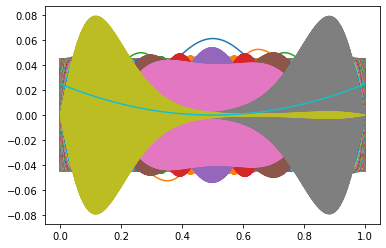

In [38]:
for eigenFunction in eigenFunctions.T:
     plt.plot(normalizedPositions[1:], eigenFunction)
plt.plot(normalizedPositions, potential / scalar / 10)

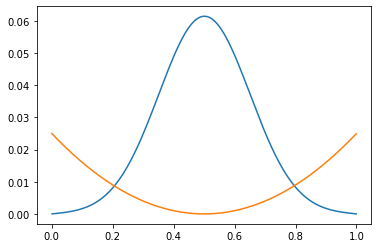

In [36]:
plt.plot(normalizedPositions[1:], eigenFunctions.T[0])
plt.plot(normalizedPositions, potential / scalar / 10)

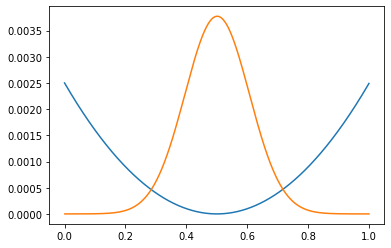

In [35]:
plt.plot(normalizedPositions, potential / scalar / 100)
plt.plot(normalizedPositions[1:], eigenFunctions.T[0] ** 2)